## 1. Preprocessing cmc dataset

In [1]:
import sys
sys.path.append("..") # This will allow to fix import issues.[to be changed]

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from tools import eda
from tools import preprocess as prep
from tools import all_steps

In [2]:
path = '../datasets/cmc.arff' # [to be changed]
df = eda.read_arff(path_data=path)

X_num, X_cat, y = all_steps.clean_cmc(df)

X = prep.join_features(X_num, X_cat)


# Samples before removing outliers: 1473
# Samples after removing outliers: 1455
Feature: weducation           | # categories: 4
Feature: heducation           | # categories: 3
Feature: wreligion            | # categories: 2
Feature: wworking             | # categories: 2
Feature: hoccupation          | # categories: 3
Feature: living_index         | # categories: 4
Feature: media_exposure       | # categories: 2

Binary cat_features: ['wreligion', 'wworking', 'media_exposure']
Remaining cat_features: ['weducation', 'heducation', 'hoccupation', 'living_index']
# Total features: 19


## 2. Analyze PCA

**Original plot**

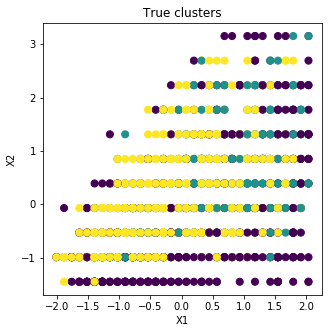

In [3]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X.values[:, 0], X.values[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('True clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [3]:
import numpy as np

X = X.values
n_components = 3
cov_matrix = np.cov(X.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
eigenvectors
# eigen_sorted = sorted(zip(eigenvalues, eigenvectors),
#                       key=lambda x: x[0], reverse=True)
# W = np.hstack(tuple(eigen[1][:, np.newaxis]
#                          for eigen in eigen_sorted[:n_components]))
# 
# total_evalues = sum(eigenvalues)
# explained_variance_ratio_ = [(eigen[0]/total_evalues)
#                                    for eigen in eigen_sorted[:n_components]]

array([[-7.06856641e-01, -2.84361582e-01, -5.85537363e-01,
         1.67660398e-01,  7.82222380e-02, -6.95784394e-02,
        -7.47110641e-03,  8.16919343e-02, -3.81662712e-02,
         8.45544744e-02, -2.93074231e-02, -1.59407872e-02,
        -1.09727807e-01, -9.51391566e-02, -5.30020325e-03,
         4.10143229e-17,  1.66400799e-17, -2.11247912e-17,
        -1.62189168e-17],
       [-6.95324479e-01,  3.27707082e-01,  6.13712505e-01,
        -9.70949340e-02, -3.86080636e-02,  2.12299089e-02,
         1.28669925e-02, -2.65015356e-02, -7.42197728e-03,
        -4.80973983e-02, -1.33705117e-02,  8.24784385e-02,
         1.03895663e-01, -2.53914853e-03,  1.00809093e-02,
         1.05845460e-16,  5.09940296e-19, -3.55076845e-17,
        -1.11572129e-16],
       [ 1.49136008e-02,  1.25257159e-01,  6.66346989e-02,
         6.04697670e-02, -8.41136301e-04,  4.77915563e-02,
        -6.88172710e-02,  2.13620317e-01, -2.41098574e-02,
         9.05869960e-01,  1.71277787e-01, -2.26162001e-01,
    

**PCA plot**

In [4]:
from decomposition.pca import PCA

print(f'Shape X: {X.values.shape}')
# print(f'Shape W: {W.shape}')

pca = PCA(n_components=10, random_state=5)
X_pca = pca.fit_transform(X.values)

print(f'Shape X_pca: {X_pca.shape}')

Shape X: (1455, 19)
Shape X_pca: (1455, 10)


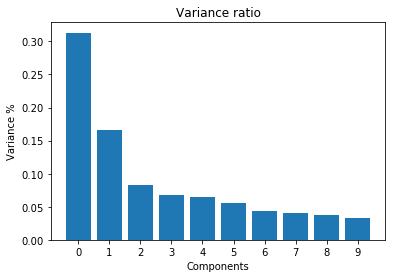

In [5]:
list_components = list(range(pca.n_components))
plt.bar(list_components, pca.explained_variance_ratio_)
plt.title('Variance ratio')
plt.xlabel('Components')
plt.ylabel('Variance %')
plt.xticks(list_components)
plt.show()

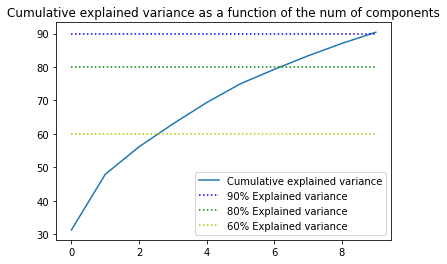

In [6]:
eda.cum_variance(pca.explained_variance_ratio_)

We choose 7 components as it contains between 80% and 90% of the total varaince.

In [7]:
from decomposition.pca import PCA

print(f'Shape X: {X.values.shape}')
# print(f'Shape W: {W.shape}')

pca = PCA(n_components=7, random_state=5)
X_pca = pca.fit_transform(X.values)

print(f'Shape X_pca: {X_pca.shape}')

Shape X: (1455, 19)
Shape X_pca: (1455, 7)


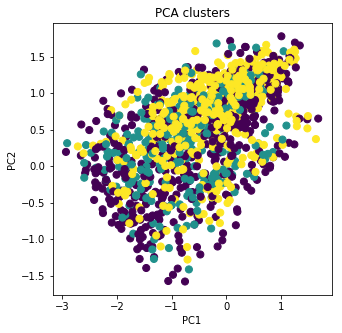

In [8]:
fig = plt.figure(figsize=(5, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('PCA clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

**Reconstructed plot**

The reconstruction step share some how the borders of the original plot but the points inside the borders are distributed differently. This is because the reconstruction step is not perfect. It involves modify the values becacause of matrix operations. 

Shape X_reconstructed: (1455, 19)


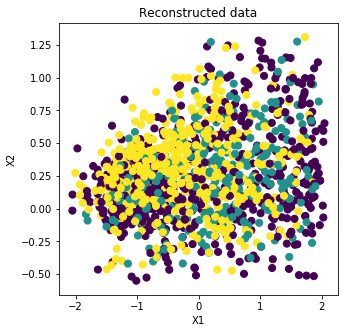

In [9]:
X_reconstructed = X_pca.dot(pca.W.T)
print(f'Shape X_reconstructed: {X_reconstructed.shape}')

fig = plt.figure(figsize=(5, 5))
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('Reconstructed data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

## 3. Analyze decomposition sklearn

The value of variance among the first three components seems similar to our implementation. Being the components about 30%, 15%, and 7% of importance, respectively, for both implementation.

The same occurs with IncrementalPCA.

### PCA

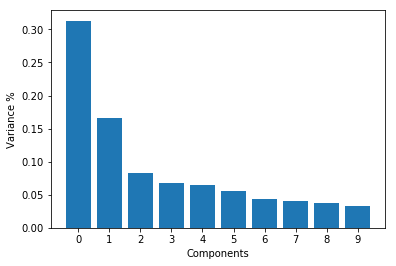

In [10]:
from tools.preprocess import graph_components
import sklearn

pca_sk = sklearn.decomposition.PCA(n_components=10, random_state=5)

X_pca_sk = pca_sk.fit_transform(X.values)

graph_components(X.values, n_components=10)


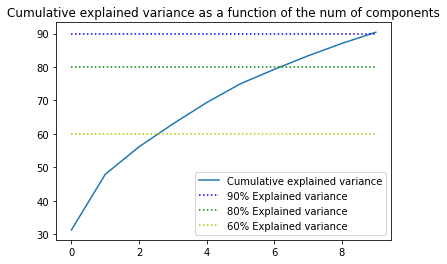

In [11]:
eda.cum_variance(pca_sk.explained_variance_ratio_)

In [12]:
# %%time
from decomposition.pca import PCA

print(f'Shape X: {X.values.shape}')
# print(f'Shape W: {W.shape}')

pca = sklearn.decomposition.PCA(n_components=7, random_state=5)
X_pca_sk = pca.fit_transform(X.values)

print(f'Shape X_pca: {X_pca_sk.shape}')

Shape X: (1455, 19)
Shape X_pca: (1455, 7)


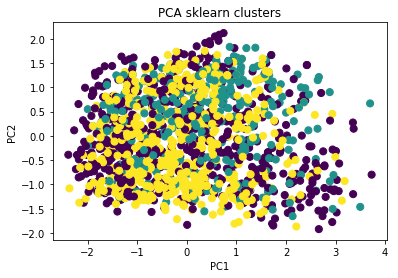

In [13]:
plt.scatter(X_pca_sk[:, 0], X_pca_sk[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('PCA sklearn clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### IncrementalPCA

Depending on the size of data, it can be faster than PCA.

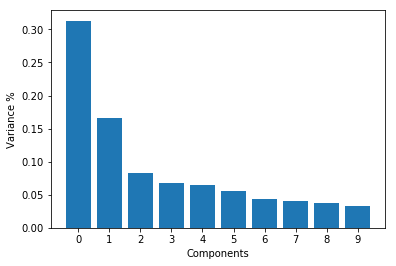

In [14]:
from tools.preprocess import graph_components
from sklearn.decomposition import PCA, IncrementalPCA

ipca = sklearn.decomposition.IncrementalPCA(n_components=10)

X_ipca_sk = ipca.fit_transform(X.values)

graph_components(X.values, n_components=10)


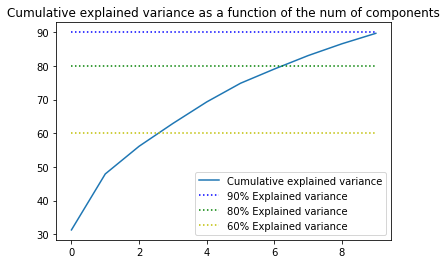

In [15]:
eda.cum_variance(ipca.explained_variance_ratio_)

In [16]:
# %%time 
from decomposition.pca import PCA

print(f'Shape X: {X.values.shape}')
# print(f'Shape W: {W.shape}')

ipca = sklearn.decomposition.IncrementalPCA(n_components=7)
X_ipca_sk = ipca.fit_transform(X.values)

print(f'Shape X_pca: {X_ipca_sk.shape}')

Shape X: (1455, 19)
Shape X_pca: (1455, 7)


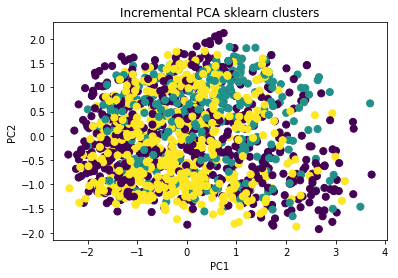

In [17]:
plt.scatter(X_ipca_sk[:, 0], X_ipca_sk[:, 1], c=y,
            s=50, cmap='viridis');
plt.title('Incremental PCA sklearn clusters')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## 4.   Use PCA and K-prototypes

We can see an improve in the metrics. The sillouete score has increased considerably. It means that separation of classes is more clear when applying PCA.

In [18]:
from decomposition.pca import PCA

print(f'Shape X: {X.values.shape}')
# print(f'Shape W: {W.shape}')

pca = PCA(n_components=3, random_state=5)
X_pca = pca.fit_transform(X.values)

print(f'Shape X_pca: {X_pca.shape}')

Shape X: (1455, 19)
Shape X_pca: (1455, 3)


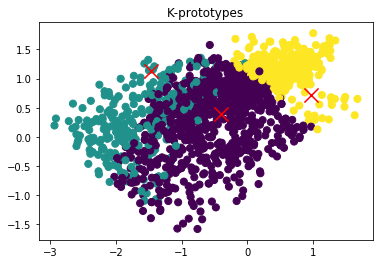

In [19]:
from cluster.kprototypes import KPrototypes

# cat_features = list(range(2, len(X.columns)))
kp = KPrototypes(n_clusters=3, cat_features=[], random_state=8)
kp.fit(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kp.labels,
            s=50, cmap='viridis');

centroids_pca = PCA(n_components=3).fit_transform(kp.centroids)
plt.scatter(centroids_pca[:,0], centroids_pca[:,1], marker='x', c='r', s=200);
plt.title('K-prototypes')
plt.show()


**Metrics**

In [20]:
from cluster.metrics import get_metrics

get_metrics(y, kp.labels, X_pca, alg='kproto')

{'ars': -0.00022388084000569974,
 'purity': 0.4254295532646048,
 'db': 1.2085029136406231,
 'f-measure': 0.2859106529209622,
 'silhouette': 0.24892845533258007}

**Previous metrics**

In [21]:
get_metrics(y, kp.labels, X, alg='kproto')

{'ars': -0.00022388084000569974,
 'purity': 0.4254295532646048,
 'db': 2.23022416592917,
 'f-measure': 0.2859106529209622,
 'silhouette': 0.11640993902051612}

## 5. Use SOM to cluster

In [26]:
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, preprocessing
from neupy import algorithms, utils
from itertools import product

# from utils import iter_neighbours


plt.style.use('ggplot')
utils.reproducible()

expanded_heatmap= True

# parser = argparse.ArgumentParser()
# parser.add_argument('--expanded-heatmap', action='store_true')

class_parameters = [
    dict(
        marker='o',
        markeredgecolor='#E24A33',
        markersize=11,
        markeredgewidth=2,
        markerfacecolor='None',
    ),
    dict(
        marker='o',
        markeredgecolor='#0000FF',
        markersize=14,
        markeredgewidth=2,
        markerfacecolor='None',
    ),
    dict(
        marker='o',
        markeredgecolor='#FFFF00',
        markersize=14,
        markeredgewidth=2,
        markerfacecolor='None',
    ),
]

GRID_HEIGHT = 50
GRID_WIDTH = 50

def load_data(X, y):
#     data, target = datasets.load_breast_cancer(return_X_y=True)

#     scaler = preprocessing.MinMaxScaler()
#     data = scaler.fit_transform(data)
    
    data = X
    target = y-1

    return data, target

def iter_neighbours(weights, hexagon=False):
    _, grid_height, grid_width = weights.shape

    hexagon_even_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (1, 1), (-1, 1))
    hexagon_odd_actions = ((-1, 0), (0, -1), (1, 0), (0, 1), (-1, -1), (1, -1))
    rectangle_actions = ((-1, 0), (0, -1), (1, 0), (0, 1))

    for neuron_x, neuron_y in product(range(grid_height), range(grid_width)):
        neighbours = []

        if hexagon and neuron_x % 2 == 1:
            actions = hexagon_even_actions
        elif hexagon:
            actions = hexagon_odd_actions
        else:
            actions = rectangle_actions

        for shift_x, shift_y in actions:
            neigbour_x = neuron_x + shift_x
            neigbour_y = neuron_y + shift_y

            if 0 <= neigbour_x < grid_height and 0 <= neigbour_y < grid_width:
                neighbours.append((neigbour_x, neigbour_y))

        yield (neuron_x, neuron_y), neighbours
        

def compute_heatmap(weight):
    heatmap = np.zeros((GRID_HEIGHT, GRID_WIDTH))
    for (neuron_x, neuron_y), neighbours in iter_neighbours(weight):
        total_distance = 0

        for (neigbour_x, neigbour_y) in neighbours:
            neuron_vec = weight[:, neuron_x, neuron_y]
            neigbour_vec = weight[:, neigbour_x, neigbour_y]

            distance = np.linalg.norm(neuron_vec - neigbour_vec)
            total_distance += distance

        avg_distance = total_distance / len(neighbours)
        heatmap[neuron_x, neuron_y] = avg_distance

    return heatmap


def compute_heatmap_expanded(weight):
    heatmap = np.zeros((2 * GRID_HEIGHT - 1, 2 * GRID_WIDTH - 1))
    for (neuron_x, neuron_y), neighbours in iter_neighbours(weight):
        for (neigbour_x, neigbour_y) in neighbours:
            neuron_vec = weight[:, neuron_x, neuron_y]
            neigbour_vec = weight[:, neigbour_x, neigbour_y]

            distance = np.linalg.norm(neuron_vec - neigbour_vec)

            if neuron_x == neigbour_x and (neigbour_y - neuron_y) == 1:
                heatmap[2 * neuron_x, 2 * neuron_y + 1] = distance

            elif (neigbour_x - neuron_x) == 1 and neigbour_y == neuron_y:
                heatmap[2 * neuron_x + 1, 2 * neuron_y] = distance

    return heatmap




def graph_sofm(X, y, n_inputs=19, epochs=20):


    sofm = algorithms.SOFM(
        n_inputs=n_inputs,
        features_grid=(GRID_HEIGHT, GRID_WIDTH),


        learning_radius=4,
        reduce_radius_after=50,

        step=0.5,
        std=1,

        shuffle_data=True,
        verbose=False,
    )


    data, target = load_data(X, y)
    sofm.train(data, epochs=epochs)
    clusters = sofm.predict(data).argmax(axis=1)

    plt.figure(figsize=(13, 13))
    plt.title(f"Embedded {n_inputs}-dimensional dataset using SOFM")

    for actual_class, cluster_index in zip(target, clusters):
        cluster_x, cluster_y = divmod(cluster_index, GRID_HEIGHT)
        parameters = class_parameters[actual_class]

        if expanded_heatmap:
            plt.plot(2 * cluster_x, 2 * cluster_y, **parameters)
        else:
            plt.plot(cluster_x, cluster_y, **parameters)

    weight = sofm.weight.reshape((sofm.n_inputs, GRID_HEIGHT, GRID_WIDTH))

    if expanded_heatmap:
        heatmap = compute_heatmap_expanded(weight)
    else:
        heatmap = compute_heatmap(weight)

    plt.imshow(heatmap, cmap='Greys_r', interpolation='nearest')

    plt.axis('off')
    plt.colorbar()
    plt.show()

## cmc

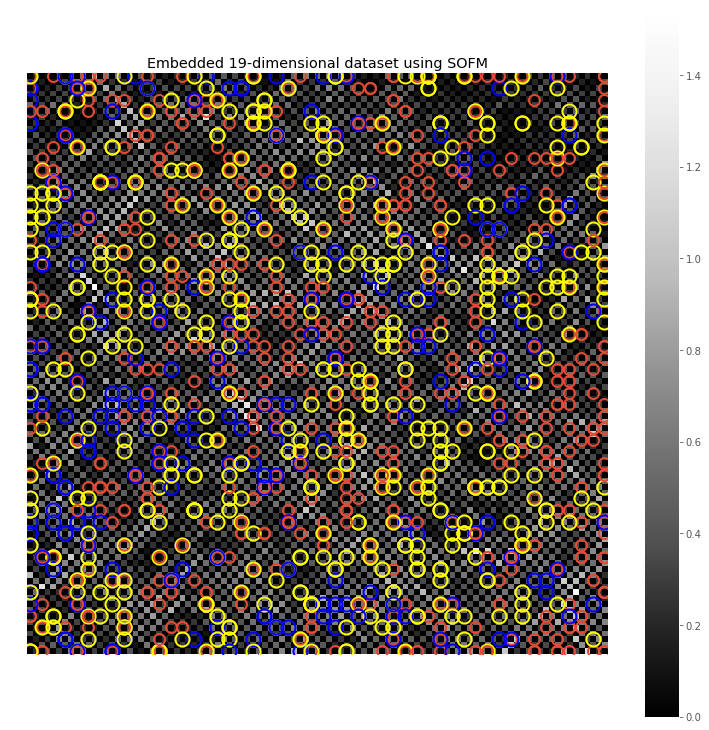

In [27]:
graph_sofm(X.values, y, n_inputs=19, epochs=50)